## Haberman’s Cancer Survival Dataset

### 1. Understanding the dataset

 **Title:** Haberman’s Survival Data

**Description:** The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Attribute Information:** <br>
Age of patient at the time of operation (numerical) <br>
Patient’s year of operation (year — 1900, numerical) <br>
Number of positive axillary nodes detected (numerical) <br>

**Survival status (class attribute) :** <br>
1 = the patient survived 5 years or longer <br>
2 = the patient died within 5 years <br>

Reference: https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb

### 2. Importing libraries and loading the file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("haberman.csv", header=None, names=['age', 'year', 'nodes', 'status'])

### 3. Understanding the data

In [3]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.shape

(306, 4)

### Observations:
1. There are no missing values in this data set. 
2. All the columns are of the integer data type.
3. The datatype of the status is an integer, it has to be converted to a categorical datatype
4. In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [7]:
df['status'] = df['status'].map({1:'Yes', 2:'No'})

In [8]:
df.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [9]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [10]:
df['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

### Observations:

Imbalanced Dataset with 225 patients survived and 81 didn't.

In [11]:
df[df['status'] == 'Yes'].describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [12]:
df[df['status'] == 'No'].describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations:
* The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs by 5 units approximately.
* The nodes of patients who survived are less when compared to patients who did not survive.

### 4. Univariate Analysis

#### 4.1 Probability Density Function(PDF)

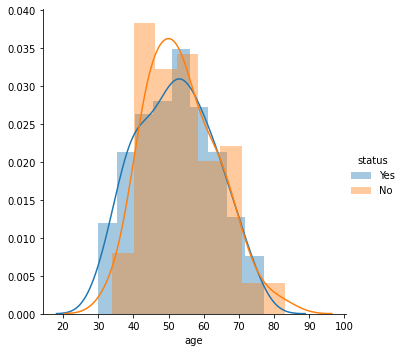

In [13]:
sns.FacetGrid(df,hue='status',height = 5).map(sns.distplot,'age').add_legend();
plt.show()

### Observations:
* Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
* Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
* Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter

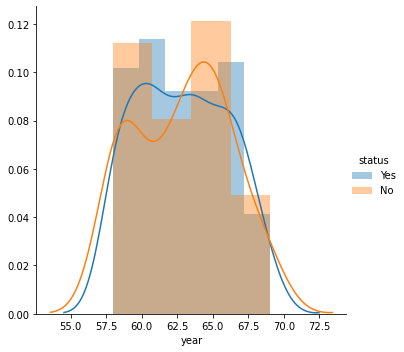

In [14]:
sns.FacetGrid(df,hue='status',height = 5).map(sns.distplot,'year').add_legend();
plt.show()

### Observations:
1. There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.
2. However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

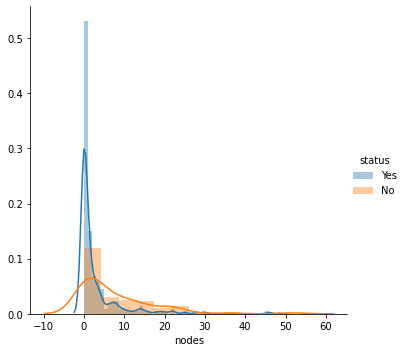

In [15]:
sns.FacetGrid(df,hue='status',height = 5).map(sns.distplot,'nodes').add_legend();
plt.show()

### Observations:
Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.

### 4.2 Cumulative Distribution Function(CDF)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


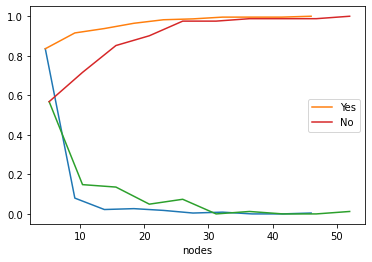

In [16]:
df_yes = df[df['status'] == 'Yes']
counts1, bin_edges1 = np.histogram(df_yes['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
df_no = df[df['status'] == 'No']
counts2, bin_edges2 = np.histogram(df_no['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

### Observations:
83.55% of the patients who have survived had nodes in the range of 0–4.6

### 4.3 Box Plots and Violin Plots

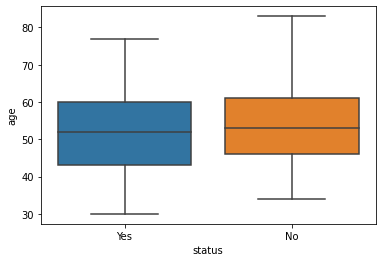

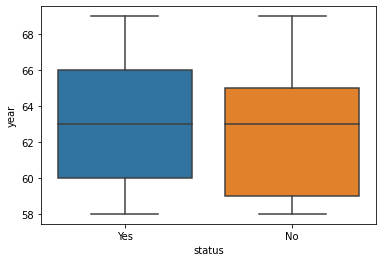

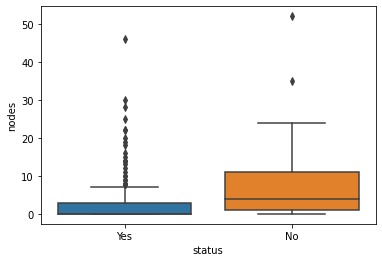

In [17]:
sns.boxplot(x='status',y='age',data=df)
plt.show()
sns.boxplot(x='status',y='year',data=df)
plt.show()
sns.boxplot(x='status',y='nodes',data=df)
plt.show()

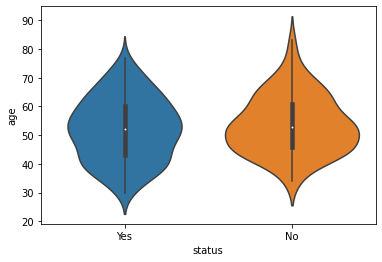

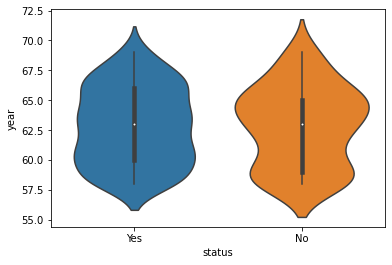

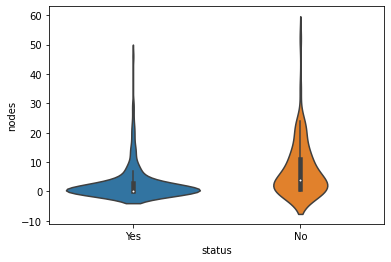

In [18]:
sns.violinplot(x='status',y='age',data = df,height = 10)
plt.show()
sns.violinplot(x='status',y='year',data = df,height = 10)
plt.show()
sns.violinplot(x='status',y='nodes',data = df,height = 10)
plt.show()

### Observations:
* Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
* A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
* There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
* There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
* The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

### 5. Bi-Variate analysis

#### 5.1 Scatter Plots

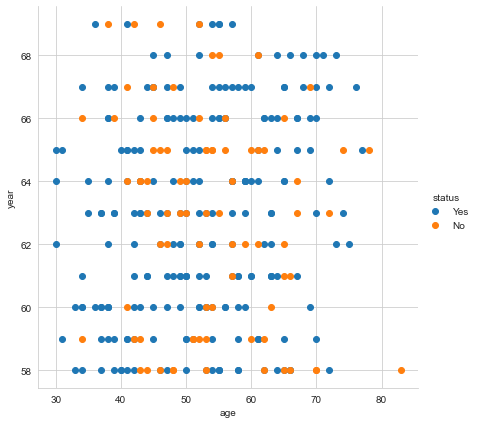

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', height = 6)\
 .map(plt.scatter,'age','year')\
 .add_legend()
plt.show()

### Observation:
* Patients with 0 nodes are more likely to survive irrespective of their age.
* There are hardly any patients who have nodes more than 25.
* Patients aged more than 50 with nodes more than 10 are less likely to survive.

#### 5.2 Pair Plots

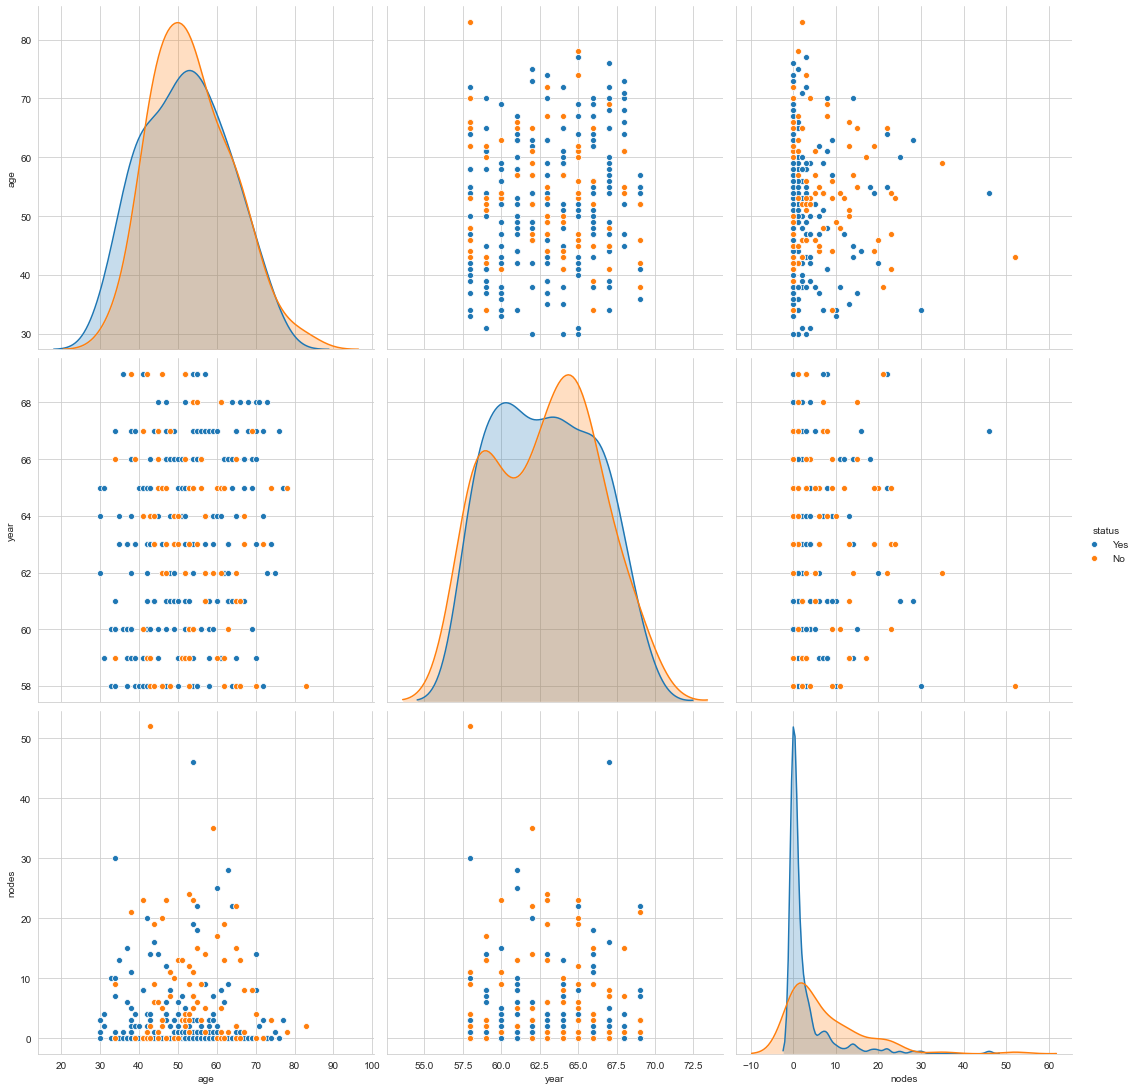

In [20]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='status', height = 5)
plt.show()

### Observations:
The plot between year and nodes is comparatively better.

### 6. Multivariate analysis

#### 6.1 Contour Plot

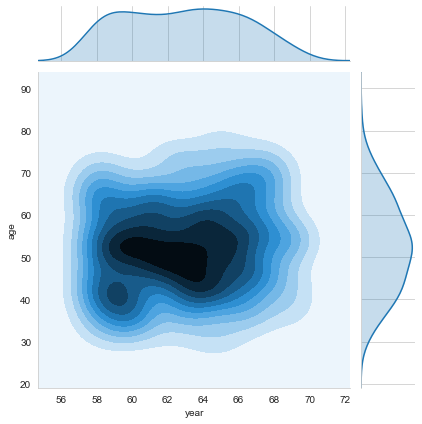

In [21]:
sns.jointplot(x = 'year', y = 'age', data = df, kind = 'kde')
plt.show()

### Observation:
From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

## Conclusions:
1. Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
2. Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.
3. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.